In [81]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat

In [82]:
with open('Data/Aufgabe_3.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T

data = f.channel_to_pos(data,cal)

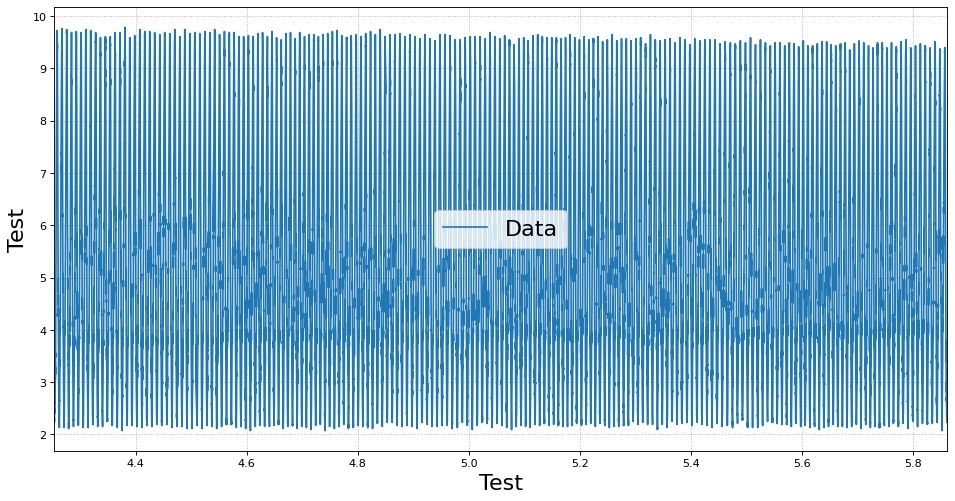

In [83]:
f.figsize(2)
plt.errorbar(data[0],data[1],label = 'Data',ecolor='lightgray')

f.form([4.2532,5.8615])

Wavelength: 3.3327089625593403e-06 m


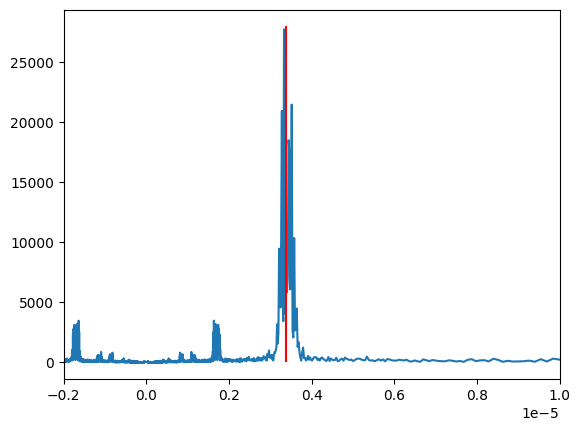

In [87]:
freq_scale = 2/5.127868608985219*1e-3

intensity = data[1]
position  = data[0]*freq_scale


intensity -= np.mean(intensity)


freqs = np.fft.fftfreq(len(intensity), d=((np.mean(np.diff(position)))))
fft_int = np.fft.fft(intensity)


peak_idx = np.argmax(np.abs(fft_int))
peak_freq = freqs[peak_idx]


print(f"Wavelength: {1/peak_freq} m")

freqs = 1/freqs

plt.plot(freqs, np.abs(fft_int))
plt.xlim(-2e-6,1e-5)
plt.vlines(3.39e-6,0,28000,colors="r")

In [85]:
dat = [freqs, np.abs(fft_int)]

sorted_indices = sorted(range(len(dat[0])), key=lambda k: dat[0][k])

dat_sorted = [[dat[0][i], dat[1][i]] for i in sorted_indices]

dat_sorted = np.array(dat_sorted).T

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 189
    # variables        = 3
    chi-square         = 1.1061e+09
    reduced chi-square = 5946912.72
    Akaike info crit   = 2951.07028
    Bayesian info crit = 2960.79552
    R-squared          = 0.58935090
[[Variables]]
    amplitude:  0.00437539 +/- 2.9539e-04 (6.75%) (init = 0.00990975)
    center:     3.4007e-06 +/- 1.1739e-08 (0.35%) (init = 3.407021e-06)
    sigma:      1.5034e-07 +/- 1.1224e-08 (7.47%) (init = 1.191292e-07)
    fwhm:       3.5401e-07 +/- 2.6431e-08 (7.47%) == '2.3548200*sigma'
    height:     11610.8258 +/- 763.101699 (6.57%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = 0.577
    C(amplitude, center) = 0.102


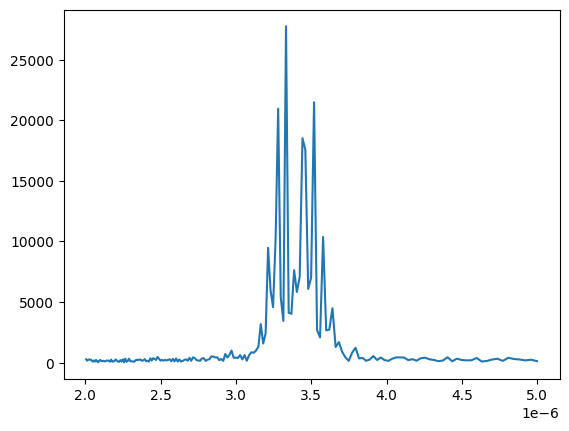

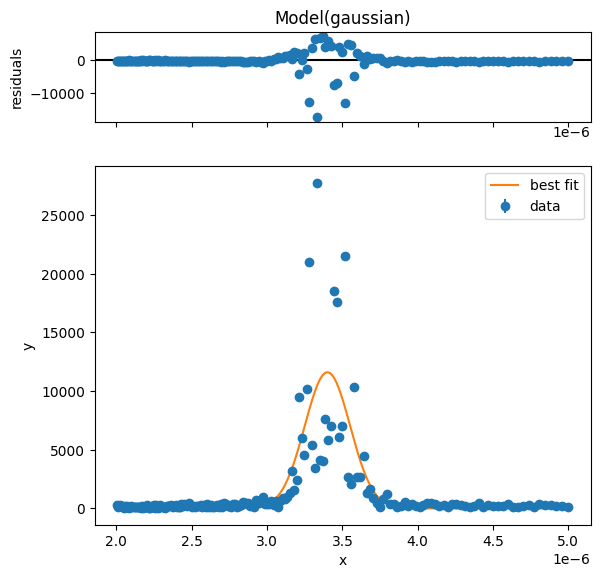

In [86]:
von,bis = f.pos(dat_sorted[0],0.2e-5),f.pos(dat_sorted[0],0.5e-5)

plt.plot(dat_sorted[0,von:bis],dat_sorted[1,von:bis])

fillerr = np.full(len(dat_sorted[0,von:bis]),1)

res = f.gausfit(dat_sorted[1,von:bis],dat_sorted[0,von:bis],fillerr)

res.plot()

print(res.fit_report())